In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn import metrics
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report

In [2]:
url='https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv'
df=pd.read_csv(url)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
features=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']
df=df[features]

In [4]:
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,male,22.0,1,0,7.2500,0
1,1,female,38.0,1,0,71.2833,1
2,3,female,26.0,0,0,7.9250,1
3,1,female,35.0,1,0,53.1000,1
4,3,male,35.0,0,0,8.0500,0


In [5]:
df.describe()

,Pclass,Age,SibSp,Parch,Fare,Survived
count,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208,0.383838
std,0.836071,14.526497,1.102743,0.806057,49.693429,0.486592
min,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [6]:
df.isna().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Survived      0
dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

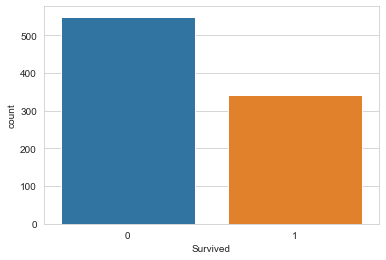

In [7]:
sns.set_style("whitegrid")
sns.countplot(df.Survived, data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

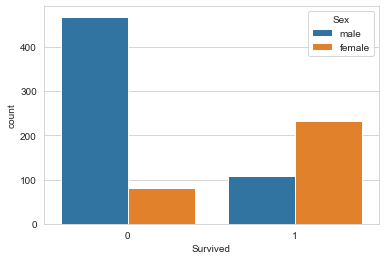

In [8]:
sns.countplot(df.Survived, hue=df.Sex)

<AxesSubplot:xlabel='Survived', ylabel='count'>

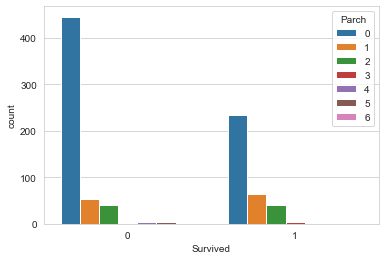

In [9]:
sns.countplot(df.Survived, hue=df.Parch)

<AxesSubplot:xlabel='Survived', ylabel='count'>

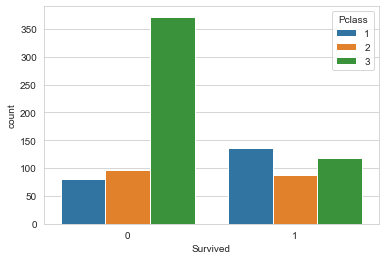

In [10]:

sns.countplot(df.Survived, data=df, hue='Pclass')

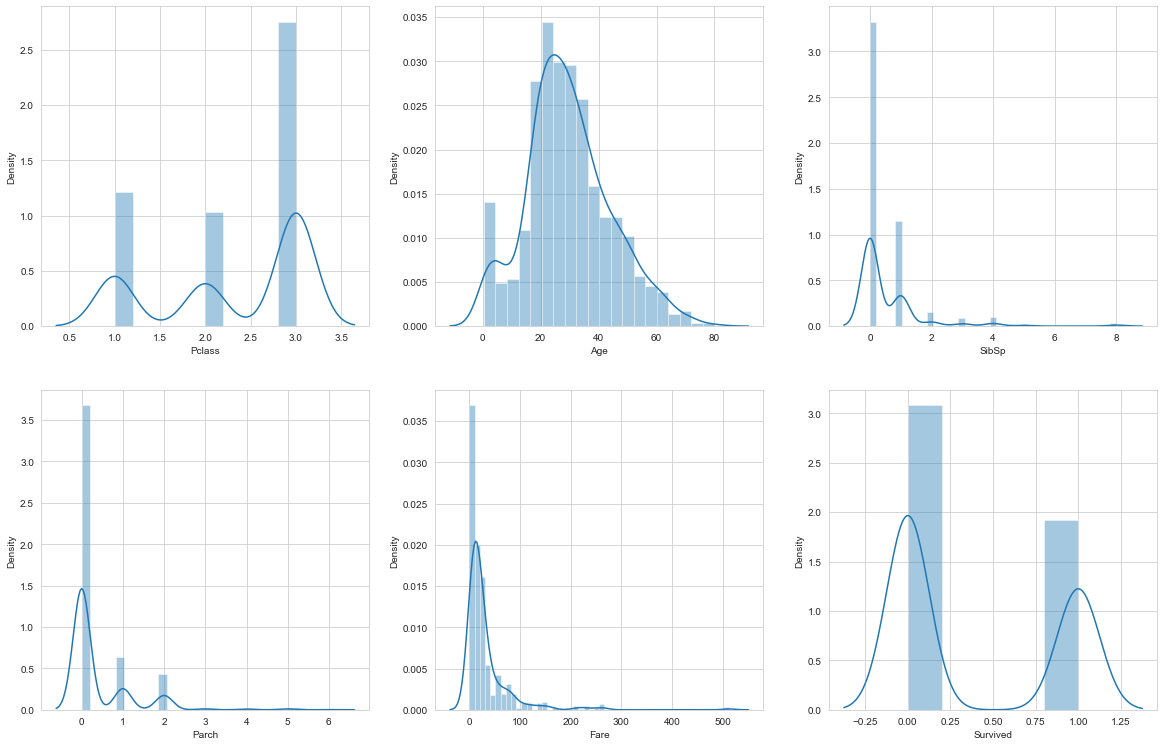

In [11]:
j=1
plt.figure(figsize=(20, 20), facecolor='white')
for i in df.drop(columns='Sex'):
    plt.subplot(3 ,3, j)
    sns.distplot(df[i])
    plt.xlabel(i)
    j+=1
plt.show()

<AxesSubplot:xlabel='SibSp', ylabel='count'>

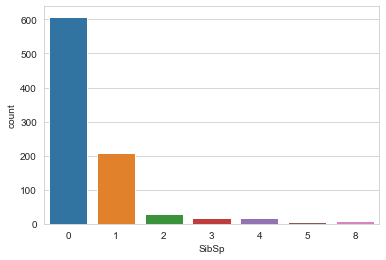

In [12]:
sns.countplot(df.SibSp)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

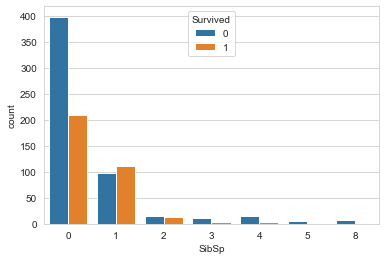

In [13]:
sns.countplot(df.SibSp, hue=df.Survived)

<AxesSubplot:>

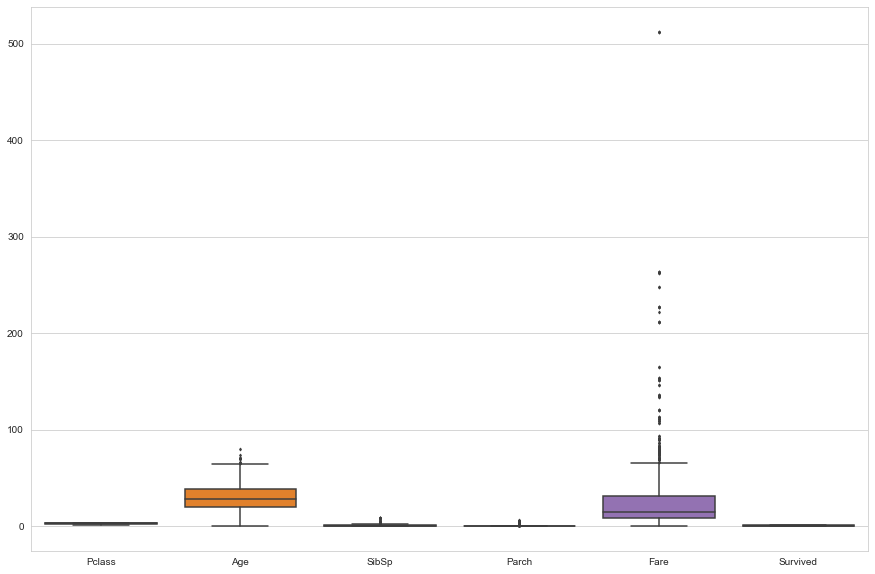

In [14]:
fig, ax=plt.subplots(figsize=(15, 10))
sns.boxplot(data=df, width=0.8, fliersize=2)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

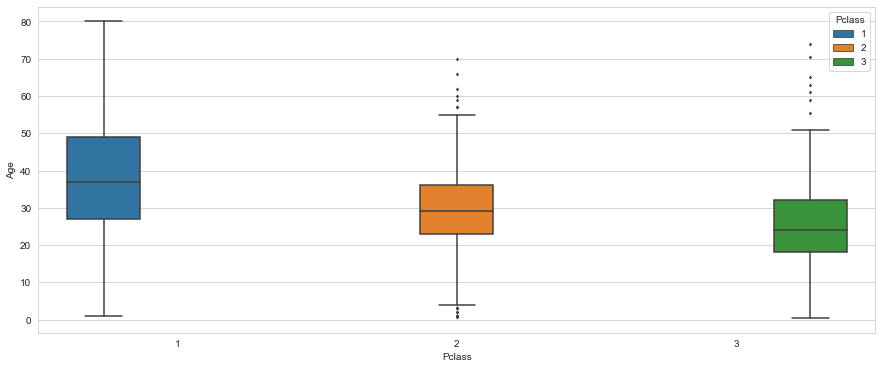

In [15]:
plt.subplots(figsize=(15,6))
sns.boxplot(x='Pclass', y='Age', data=df, hue=df.Pclass,  width=0.8, fliersize=2)

In [20]:
df.isna().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Survived      0
dtype: int64

In [63]:
for i in range(3):
    print(df[df['Pclass']==i+1]['Age'].describe())

count    216.000000
mean      37.576019
std       13.532450
min        0.920000
25%       29.000000
50%       37.000000
75%       47.000000
max       80.000000
Name: Age, dtype: float64
count    184.000000
mean      29.689293
std       13.522399
min        0.670000
25%       23.000000
50%       29.000000
75%       36.000000
max       70.000000
Name: Age, dtype: float64
count    491.000000
mean      24.655642
std       10.380867
min        0.420000
25%       20.250000
50%       24.000000
75%       29.000000
max       74.000000
Name: Age, dtype: float64


In [21]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [22]:
df['Age'] = df[['Age','Pclass']].apply(impute_age,axis=1)
df.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Survived    0
dtype: int64

### Outlier removal

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

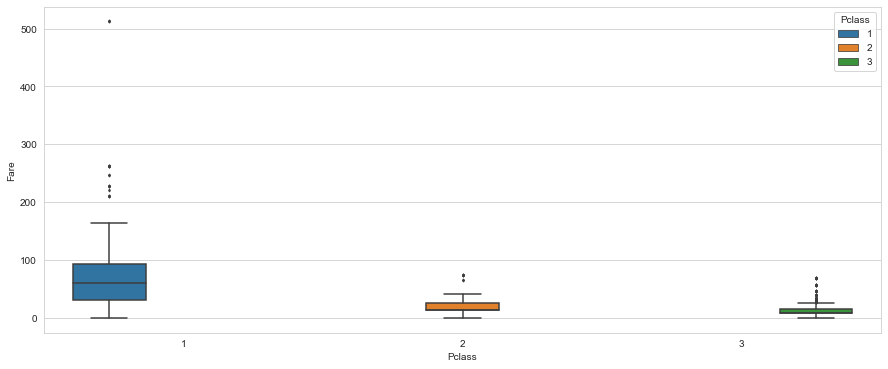

In [23]:
plt.subplots(figsize=(15,6))
sns.boxplot(x='Pclass', y='Fare', data=df, hue=df.Pclass,  width=0.8, fliersize=2)

<AxesSubplot:xlabel='Fare', ylabel='Density'>

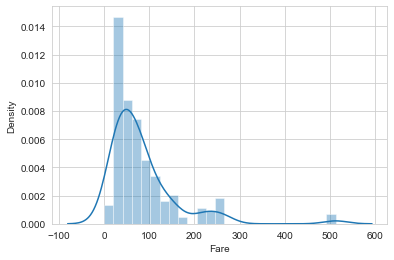

In [24]:
sns.distplot(df[df['Pclass']==1]['Fare'])

<AxesSubplot:xlabel='Fare', ylabel='Density'>

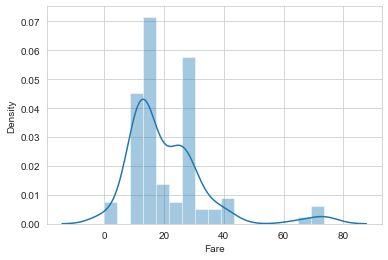

In [25]:
sns.distplot(df[df['Pclass']==2]['Fare'])

<AxesSubplot:xlabel='Fare', ylabel='Density'>

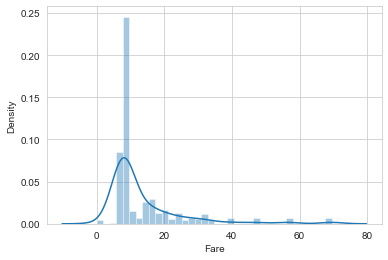

In [26]:
sns.distplot(df[df['Pclass']==3]['Fare'])

#### From the above created plots we can say that fare has sufficient outliers which may affact the model prediction. Even tree algorithms are the affacted by outliers but still for practice I am going to perform outlier removal steps

In [27]:
for i in range(3):
    print(df[df['Pclass']==i+1]['Fare'].describe())

count    216.000000
mean      84.154687
std       78.380373
min        0.000000
25%       30.923950
50%       60.287500
75%       93.500000
max      512.329200
Name: Fare, dtype: float64
count    184.000000
mean      20.662183
std       13.417399
min        0.000000
25%       13.000000
50%       14.250000
75%       26.000000
max       73.500000
Name: Fare, dtype: float64
count    491.000000
mean      13.675550
std       11.778142
min        0.000000
25%        7.750000
50%        8.050000
75%       15.500000
max       69.550000
Name: Fare, dtype: float64


In [28]:
#Fare has outliers and it is rightly skewed

#### Lets compute the Interquantile range to calculate the boundaries
for i in range(3):
    IQR=df[df['Pclass']==i+1]['Fare'].quantile(0.75)-df[df['Pclass']==i+1]['Fare'].quantile(0.25)
    lower_bridge=df[df['Pclass']==i+1]['Fare'].quantile(0.25)-(IQR*1.5)
    upper_bridge=df[df['Pclass']==i+1]['Fare'].quantile(0.25)+(IQR*1.5)
    print('For class {} upperBridge of fare is {} and lowerBridge of fare is {}'.format(i+1, upper_bridge, lower_bridge))

For class 1 upperBridge of fare is 124.788025 and lowerBridge of fare is -62.940125
For class 2 upperBridge of fare is 32.5 and lowerBridge of fare is -6.5
For class 3 upperBridge of fare is 19.375 and lowerBridge of fare is -3.875


In [29]:
# Outlier removal from Fare corresponds to class1
a=df[df['Pclass']==1]['Fare']
b=[124 if x>=124 else x for x in a]
b=pd.Series(b)
b.index=df[df['Pclass']==1]['Fare'].index
class1_index=df[df['Pclass']==1]['Fare'].index

In [30]:
for i in class1_index:
    df.replace(df[df['Pclass']==1]['Fare'][i], b[i], inplace=True)

In [31]:
# Outlier removal from Fare corresponds to class2
a2=df[df['Pclass']==2]['Fare']
b2=[32 if x>=32 else x for x in a2]
b2=pd.Series(b2)
b2.index=df[df['Pclass']==2]['Fare'].index
class2_index=df[df['Pclass']==2]['Fare'].index

In [32]:
for i in class2_index:
    df.replace(df[df['Pclass']==2]['Fare'][i], b2[i], inplace=True)

In [33]:
# Outlier removal from Fare corresponds to class3
a3=df[df['Pclass']==3]['Fare']
b3=[19 if x>=19 else x for x in a3]
b3=pd.Series(b3)
b3.index=df[df['Pclass']==3]['Fare'].index
class3_index=df[df['Pclass']==3]['Fare'].index

In [34]:
for i in class3_index:
    df.replace(df[df['Pclass']==3]['Fare'][i], b3[i], inplace=True)

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

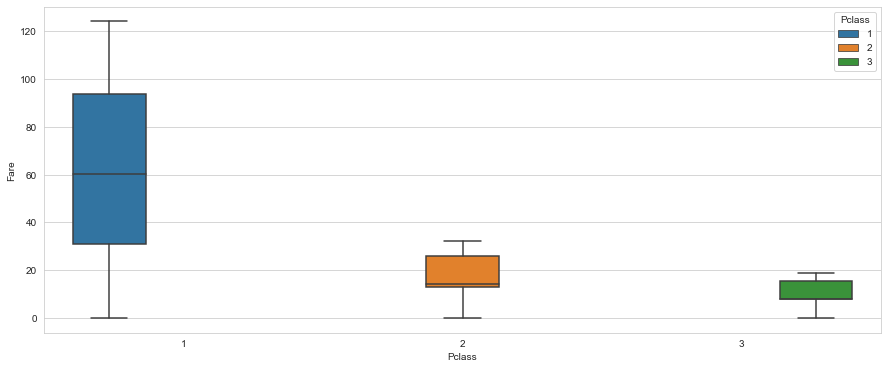

In [35]:
plt.subplots(figsize=(15,6))
sns.boxplot(x='Pclass', y='Fare', data=df, hue=df.Pclass,  width=0.8, fliersize=2)

In [36]:
#plt.subplots(figsize=(15,6))
#sns.boxplot(x='Pclass', y='Age', data=df, hue=df.Pclass,  width=0.8, fliersize=2)

### Categorical data to numeric

In [37]:
sex = pd.get_dummies(df['Sex'],drop_first=True)

In [38]:
df.drop(columns='Sex', inplace=True)

In [39]:
df=pd.concat([df, sex], axis=1)
df.head()

,Pclass,Age,SibSp,Parch,Fare,Survived,male
0,3,22.0,1,0,7.2500,0,1
1,1,38.0,1,0,71.2833,1,0
2,3,26.0,0,0,7.9250,1,0
3,1,35.0,1,0,53.1000,1,0
4,3,35.0,0,0,8.0500,0,1


In [40]:
x=df.drop(columns='Survived')
y=df.Survived

In [41]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20, random_state= 355)

In [42]:
#let's first visualize the tree on the data without doing any pre processing
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [43]:
feature_name=list(x.columns)
class_name = list(y_train.unique())
feature_name

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male']

In [44]:
import pydotplus
from sklearn.tree import export_graphviz
from sklearn import tree


In [45]:
# create a dot_file which stores the tree structure
#dot_data = export_graphviz(clf,feature_names = feature_name,rounded = True,filled = True)
# Draw graph
#graph = pydotplus.graph_from_dot_data(dot_data)  
#graph.write_png("myTree.png")
# Show graph
#Image(graph.create_png())

In [46]:
clf.score(x_train,y_train)

0.9831460674157303

In [47]:
py_pred = clf.predict(x_test)

In [48]:
# accuracy of our classification tree
clf.score(x_test,y_test)

0.7430167597765364

In [49]:
# we are tuning three hyperparameters right now, we are passing the different values for both parameters
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']   
}

In [50]:
grid_search = GridSearchCV(estimator=clf,
                     param_grid=grid_param,
                     cv=5,
                    n_jobs =-1)

In [51]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [52]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'entropy', 'max_depth': 11, 'min_samples_leaf': 8, 'min_samples_split': 3, 'splitter': 'best'}


In [53]:
grid_search.best_score_

0.8244262779474048

In [59]:
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth =11, min_samples_leaf= 8, min_samples_split= 3, splitter ='best')
clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=11, min_samples_leaf=8,
                       min_samples_split=3)

In [60]:
clf.score(x_test,y_test)

0.7932960893854749

In [61]:
y_pred=clf.predict(x_test)
y_test_arr=np.array(y_test)
y_test_arr

array([1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1], dtype=int64)

Great!! Our test score has improved after using Gridsearch.

In [62]:
df_pred=pd.DataFrame(np.column_stack((y_test_arr,y_pred)), columns=['y_actual', 'y_pred'])
df_pred

,y_actual,y_pred
0,1,1
1,0,0
2,1,1
3,0,0
4,0,0
...,...,...
174,0,0
175,0,0
176,0,0
177,0,0


In [58]:
#I have done predition before and after removal of outlies (both cases have not shown in this notebook). I have seen 3% accuracy
# improvement 